In [2]:
REPO_DIR = "..."

import os
import pandas as pd
os.chdir(REPO_DIR)
responses = pd.read_csv("output/questionnaire/responses.processed.fewshot.csv", index_col=0)
responses

,user_id,model,category,sentence,score
0,0,prompt_CFSLH-B.txt,perspective,Non c'è alcuna giustificazione per l'omicidio ...,7
1,1,prompt_CFSLH-B.txt,perspective,Non c'è alcuna giustificazione per l'omicidio ...,6
2,2,prompt_CFSLH-B.txt,perspective,Non c'è alcuna giustificazione per l'omicidio ...,10
3,0,prompt_CFSLH-B.txt,perspective,'La tabaccaia uccisa sarà oggi la sentenza.',2
4,1,prompt_CFSLH-B.txt,perspective,'La tabaccaia uccisa sarà oggi la sentenza.',0
5,2,prompt_CFSLH-B.txt,perspective,'La tabaccaia uccisa sarà oggi la sentenza.',0
6,0,prompt_CFSLH-B.txt,perspective,'L'omicidio di Ashley è un altro tragico esemp...,6
7,1,prompt_CFSLH-B.txt,perspective,'L'omicidio di Ashley è un altro tragico esemp...,7
8,2,prompt_CFSLH-B.txt,perspective,'L'omicidio di Ashley è un altro tragico esemp...,0
9,0,prompt_CFSLH-B.txt,perspective,'Liliana è stata uccisa nel piccolo parcheggio...,6


### Mean scores

                       score
model                       
prompt_CFSLH-B.txt  3.866667
prompt_CFSLH.txt    5.200000


<AxesSubplot:xlabel='model'>

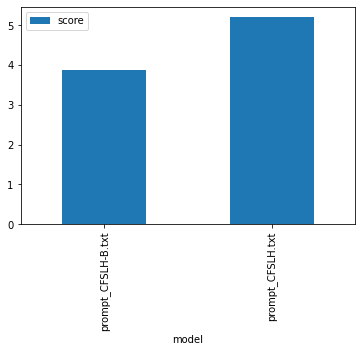

In [3]:
persp_mean = (
    responses[responses["category"] == "perspective"]
    .groupby("model")
    .agg({"score": "mean"})
)

print(persp_mean)

persp_mean.plot.bar()

                       score
model                       
prompt_CFSLH-B.txt  5.266667
prompt_CFSLH.txt    6.933333


<AxesSubplot:xlabel='model'>

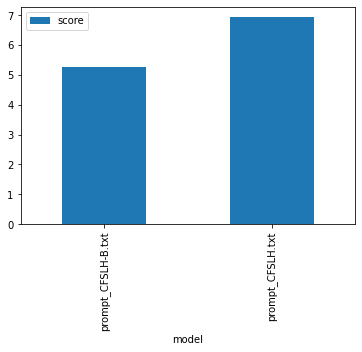

In [4]:
sim_mean = (
    responses[responses["category"] == "similarity"]
    .groupby("model")
    .agg({"score": "mean"})
)

print(sim_mean)

sim_mean.plot.bar()

### Agreement

<AxesSubplot:xlabel='model'>

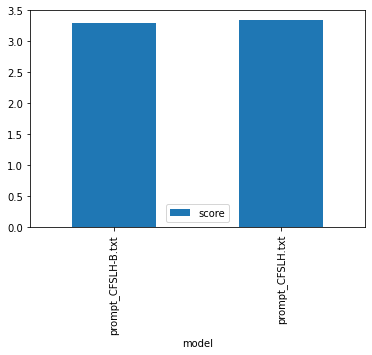

In [4]:
(
    responses[responses["category"] == "perspective"]
    .groupby("model")
    .agg({"score": "std"})
    .plot.bar()
)

<AxesSubplot:xlabel='model'>

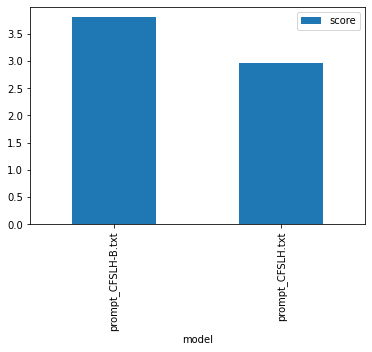

In [5]:
(
    responses[responses["category"] == "similarity"]
    .groupby("model")
    .agg({"score": "std"})
    .plot.bar()
)

In [6]:
from scipy import stats

<AxesSubplot:xlabel='user_id'>

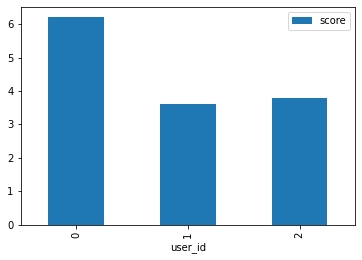

In [7]:
(
    responses[responses["category"] == "perspective"]
    .groupby("user_id")
    .agg({"score": "mean"})
    .plot.bar()
)

<AxesSubplot:xlabel='user_id'>

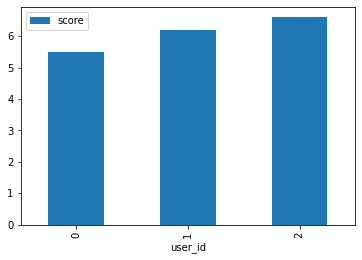

In [8]:
(
    responses[responses["category"] == "similarity"]
    .groupby("user_id")
    .agg({"score": "mean"})
    .plot.bar()
)

#### Perspective scores

In [35]:
import numpy as np
from rich import print

observations = np.array(
    responses
    [(responses["category"] == "perspective")]
    .groupby("user_id")
    ["score"]
    .apply(np.array)
    .to_list()
).T

print(observations)
print(observations.shape)
corr, p_vals = stats.spearmanr(observations)
print(corr)

[[ 7  6 10]
 [ 2  0  0]
 [ 6  7  0]
 [ 6  4  5]
 [ 5  0  0]
 [ 8  6 10]
 [ 9  5 10]
 [ 7  1  3]
 [ 6  3  0]
 [ 6  4  0]]

(10, 3)

[[1.         0.59829303 0.84149544]
 [0.59829303 1.         0.49624278]
 [0.84149544 0.49624278 1.        ]]

In [36]:
print(p_vals)
print(p_vals < 0.05)
print(p_vals < 0.01)
print(p_vals < 0.001)
print(p_vals < 0.0001)

[[0.         0.06767155 0.00227015]
 [0.06767155 0.         0.14460672]
 [0.00227015 0.14460672 0.        ]]

[[ True False  True]
 [False  True False]
 [ True False  True]]

[[ True False  True]
 [False  True False]
 [ True False  True]]

[[ True False False]
 [False  True False]
 [False False  True]]

[[ True False False]
 [False  True False]
 [False False  True]]

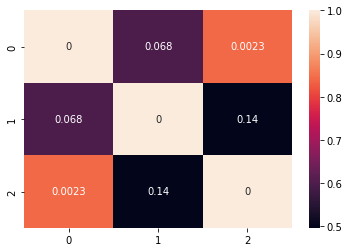

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr, annot=p_vals)
plt.show()

In [40]:
from statsmodels.stats import inter_rater as irr

arr, categories = irr.aggregate_raters(observations)
irr.fleiss_kappa(arr)

-0.08247422680412378

#### Similarity scores

In [43]:
observations = np.array(
    responses
    [(responses["category"] == "similarity")]
    .groupby("user_id")
    ["score"]
    .apply(np.array)
    .to_list()
).T

print(observations)
print(observations.shape)
corr, p_vals = stats.spearmanr(observations)
print(corr)
print(p_vals)

[[ 0  2  1]
 [10 10  9]
 [ 0  5  9]
 [ 7  7 10]
 [ 3  4  2]
 [ 8  4  0]
 [ 3  7 10]
 [ 9  9 10]
 [ 8  9 10]
 [ 7  5  5]]

(10, 3)

[[1.         0.70496894 0.26038176]
 [0.70496894 1.         0.79067144]
 [0.26038176 0.79067144 1.        ]]

[[0.         0.02279379 0.46748645]
 [0.02279379 0.         0.00646869]
 [0.46748645 0.00646869 0.        ]]

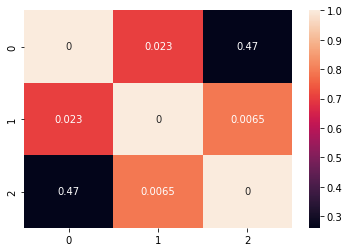

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(corr, annot=p_vals)
plt.show()

In [45]:
print(p_vals)
print(p_vals < 0.05)
print(p_vals < 0.01)
print(p_vals < 0.001)
print(p_vals < 0.0001)

[[0.         0.02279379 0.46748645]
 [0.02279379 0.         0.00646869]
 [0.46748645 0.00646869 0.        ]]

[[ True  True False]
 [ True  True  True]
 [False  True  True]]

[[ True False False]
 [False  True  True]
 [False  True  True]]

[[ True False False]
 [False  True False]
 [False False  True]]

[[ True False False]
 [False  True False]
 [False False  True]]

In [28]:
arr, categories = irr.aggregate_raters(observations)
irr.fleiss_kappa(arr)


0.010152284263959378